In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Graduation/dataset/BreastDataset227.zip" -d "/content/drive/MyDrive/Graduation/dataset/BreastDataset227"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Graduation/dataset/BreastDataset227/BreastDataset771/22613702 (47).png  
  inflating: /content/drive/MyDrive/Graduation/dataset/BreastDataset227/BreastDataset771/22613702 (48).png  
  inflating: /content/drive/MyDrive/Graduation/dataset/BreastDataset227/BreastDataset771/22613702 (49).png  
  inflating: /content/drive/MyDrive/Graduation/dataset/BreastDataset227/BreastDataset771/22613702 (5).png  
  inflating: /content/drive/MyDrive/Graduation/dataset/BreastDataset227/BreastDataset771/22613702 (50).png  
  inflating: /content/drive/MyDrive/Graduation/dataset/BreastDataset227/BreastDataset771/22613702 (51).png  
  inflating: /content/drive/MyDrive/Graduation/dataset/BreastDataset227/BreastDataset771/22613702 (52).png  
  inflating: /content/drive/MyDrive/Graduation/dataset/BreastDataset227/BreastDataset771/22613702 (53).png  
  inflating: /content/drive/MyDrive/Graduation/dataset/BreastDataset227/Breast

In [ ]:
!pip install tflearn

     |████████████████████████████████| 107 kB 5.3 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=29d0cc06254efe1740243fff90f6998cbe49b47943bfc474e59a6786b574d337
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
import numpy as np
import os
from random import shuffle
from tqdm import tqdm

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tflearn
from keras.applications.resnet import decode_predictions
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dropout,Flatten,Dense,Activation,BatchNormalization

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from keras.backend import shape
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tflearn
from keras.applications.resnet import decode_predictions
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dropout,Flatten,Dense,Activation,BatchNormalization


DATA_DIR = r'/content/drive/MyDrive/Graduation/dataset/BreastDataset227/BreastDataset771'
IMG_SIZE = 227
LR = 0.001
MODEL_NAME = 'Benign-vs-Malignant-cnn'
def create_label(image_name):
    """ Create an one-hot encoded vector from image name """
    word = image_name.split('.')
    #print(word)
    word_label1=word[0]
    #print(word_label1)
    word_label=word_label1[0:8]
    #print(word_label)
    # density 1Benign
    if (word_label == '20588680') |  (word_label== '22580680')|(word_label=='22580732')  |(word_label=='22670620')| (word_label=='22670673')|(word_label=='50995762')|(word_label=='50995789')|(word_label=='53586869')  | (word_label=='53586896' )| (word_label=='53586960')|(word_label=='53587014')|(word_label=='53587663'):
        #print ("0")
        return (0)
   # density 1Malignant
    elif (word_label == '20587612')| (word_label=='20587664' )| (word_label== '22580654' )|(word_label=='22580706') |  (word_label=='22614379' )| (word_label=='22614431') | (word_label=='22670094' )|(word_label=='22670147')|(word_label== '22670278' )|(word_label== '22670324') |(word_label== '22670809' )| (word_label=='22670855')| (word_label =='24055445')|( word_label=='24055464') | (word_label=='24055483') |(word_label=='24055502' )| (word_label== '24065707' )|( word_label=='24065761')| (word_label=='27829134')|(word_label=='27829188')|(word_label=='30011507' )|(word_label=='30011553')| (word_label=='30011674')| (word_label== '30011727')| (word_label== '50996352')| (word_label=='50996406')| (word_label=='50999432' )|(word_label=='50999459')|(word_label=='53581406')|(word_label=='53581460'):
        #print ("1")
        return (1)
    # density 2Benign
    elif (word_label == '20586908') | (word_label=='20586960') | (word_label=='22580192') |(word_label=='22580244'):
        #print ("2")
        return (2)
    # density 2Malignant
    elif (word_label =='20586934')|(word_label=='20586986') |(word_label=='20588190')|(word_label=='20588216') |(word_label=='20588536') |(word_label=='20588562') |(word_label=='22427705') |(word_label=='22427751') |  (word_label=='22427840') | (word_label=='22579730') |(word_label=='22580038')|(word_label=='22580098') |(word_label=='22613650') |(word_label=='22613702')|(word_label=='22613770')|(word_label=='22613822') |(word_label=='22614074')|(word_label=='22614127')|(word_label=='22614236')|(word_label=='22614266')|( word_label=='22670465')| (word_label=='22670511')|(word_label=='24055274') | (word_label=='24055355')|(word_label=='24065251')|(word_label=='24065289')|(word_label== '50998981')|(word_label=='50999008')|(word_label=='53580804' )| (word_label=='53580858')|(word_label=='53582656')|(word_label=='53582683'):
        #print ("3")
        return (3)
    # density 3Benign
    elif (word_label == '20587758')| (word_label=='20587810') | (word_label=='22580341') |(word_label=='22580367') |(word_label=='22580393')|(word_label=='22580419')|(word_label=='22678787')|(word_label=='22678833')|(word_label=='50994408') |(word_label=='51048738')| (word_label=='51048765') | (word_label=='51049053' )|(word_label=='51049107'):
        #print ("4")
        return (4)
    # density 3Malignant
    elif (word_label == '20587994')| (word_label=='20588046') |(word_label=='22614522')|(word_label=='22614568')|(word_label=='50994273') |(word_label=='50994354') |(word_label=='50997461')|(word_label=='50997515'):
        #print ("5")
        return (5)
    # density 4Benign
    elif (word_label == '20587902')|(word_label== '20587928') |(word_label=='20588308') |(word_label=='20588334') |(word_label=='22678646' )|(word_label=='22678694'):
        #print ("6")
        return (6)
    # density 4Malignant
    elif (word_label == '24065530'):
        #print ("7")
        return (7)
    else:
        #print ("-1")
        return (-1)

def create_label_data():
    data = []
    for img in tqdm(os.listdir(DATA_DIR)):
        path = os.path.join(DATA_DIR, img)
        
        img_data = cv2.imread(path, 0)
        img_data = cv2.resize(img_data,(IMG_SIZE, IMG_SIZE))
        if(create_label(img)!=-1):
          data.append([(img_data),create_label(img)])  
             
    return data
data=create_label_data()


100%|██████████| 5293/5293 [00:29<00:00, 182.12it/s]


In [ ]:
from sklearn.model_selection import train_test_split

img_rows, img_cols = 227, 227
input_shape = (img_rows, img_cols, 1)

X =np.array([i[0] for i in data]).reshape(-1,img_rows, img_cols, 1)
Y =[i[1] for i in data]

# train 80% test 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

# validation 20 % train  60%

#X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train, test_size=0.2,random_state=0)


model= Sequential()

# layer1
model.add(Conv2D(16,(3,3),activation = 'relu' , input_shape = input_shape))
model.add(MaxPooling2D(2, 2))
# layer2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# layer3
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
#classes = 8 
model.add(Dense(8,activation='softmax'))
#epochs=10
model.summary()
model.compile( loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

#print(X_train.shape)
#print (len(y_train.rehape(-1,1)))

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# k Fold 
#kfold = KFold(n_splits=3, shuffle=True, random_state=2019) 

#results = cross_val_score(model, X_train, y_train, cv=kfold)


#validation_data=(X_validation,y_validation)

history = model.fit( X_train,y_train,epochs=40,batch_size=10)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 110, 110, 64)      9280      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 53, 53, 64)        36928     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 26, 26, 64)     

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate(X_test, y_test, batch_size=5,verbose=1)

print("[INFO] accuracy: {:.1f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {:.10f}".format(eval_loss)) 

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[INFO] accuracy: 94.6%
[INFO] Loss: 0.8356611896


In [ ]:

from sklearn import metrics
def TestClass():
    data = []
    for img in tqdm(os.listdir('/content/drive/MyDrive/Graduation/dataset/Malignant Density 4')):
        path = os.path.join('/content/drive/MyDrive/Graduation/dataset/Malignant Density 4', img)
        img_data = cv2.imread(path, 0)
        img_data = cv2.resize(img_data,(IMG_SIZE, IMG_SIZE))
        data.append(img_data)  
             
    return data
test_class=TestClass()
Y_pre=[]
Y_test=[]
for img in test_class:  

  test_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
  img = test_img.reshape(-1,IMG_SIZE, IMG_SIZE, 1)
  prediction = model.predict(img)
  classValue=np.max(prediction)
  ClassID=np.where( prediction==classValue)
  Y_pre.append(ClassID[1])
  Y_test.append(7)
   
          

print ()



print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pre))
print ()
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pre))
print ()
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pre)))
print ()


100%|██████████| 72/72 [00:00<00:00, 206.58it/s]
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



Mean Absolute Error: 0.1111111111111111

Mean Squared Error: 0.4444444444444444

Root Mean Squared Error: 0.6666666666666666



test image 1
********************
Class Label :  [7]
Class Name :  density 4Malignant
####################
[INFO] accuracy: 94.6%
[INFO] Loss: 0.8356611896
####################


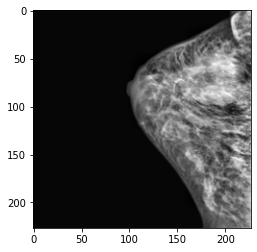

In [ ]:
import matplotlib.pyplot as plt
import cv2
             
IMG_SIZE=227                                                                     #20586908 (2)
img = cv2.imread('/content/drive/MyDrive/Graduation/dataset/BreastDataset227/BreastDataset771/24065530 (13).png',0)
test_img = cv2.resize(img,(IMG_SIZE, IMG_SIZE))
test_img = test_img.reshape(-1,IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict(test_img)
#pre=decode_predictions(prediction,top=8)
classValue=np.max(prediction)
#print(prediction)
#print("#"*20)

ClassID=np.where( prediction==classValue)

print ("test image 1")
print("*"*20)

print("Class Label : ",ClassID[1])
if(ClassID[1]==0):
  print("Class Name : density 1Benign")
elif(ClassID[1]==1):
  print("Class Name : density 1Malignant")
elif(ClassID[1]==2):
  print("Class Name :  density 2Benign")
elif(ClassID[1]==3):
  print("Class Name : density 2Malignant")
elif(ClassID[1]==4):
  print("Class Name : density 3Benign")
elif(ClassID[1]==5):
  print("Class Name :  density 3Malignant")
elif(ClassID[1]==6):
  print("Class Name :  density 4Benign")
elif(ClassID[1]==7):
  print("Class Name :  density 4Malignant")
else:
  print("No")
print("#"*20)
print("[INFO] accuracy: {:.1f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {:.10f}".format(eval_loss)) 
print("#"*20)
fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(111)
ax.imshow(img,cmap='gray')

plt.show()




